# **Project Name**    - Car Price Prediction



# **Problem Statement**


The car market features a wide variety of vehicles differing in brand, body type, engine specifications, and other features. Each car is associated with a price that is influenced by various characteristics such as the manufacturing year, mileage, engine size, fuel type, transmission, and number of previous owners. Predicting the price of a car based on these attributes is a valuable task for both buyers and sellers. This project aims to develop a machine learning model that can accurately predict the price of a car using its key features.

## ***1. Dataset Overview***

In [456]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd
import xgboost as xgb
# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Library used for ML Model implementation
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor


# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [350]:
# Load Dataset
df = pd.read_csv("../Rutuja/Downloads/car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [352]:
# Dataset Rows & Columns count
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  301
Number of columns are:  9


In [354]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### Duplicate Values

In [357]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 2


#### Missing Values

In [360]:
# Missing Values/Null Values Count
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

## ***2. Understanding The Variables***

In [363]:
# Dataset Columns
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [365]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.00,301.00,301.00,301.00,301,301,301,301.00
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.63,4.66,7.63,36947.21,NaN,NaN,NaN,0.04
std,NaN,2.89,5.08,8.64,38886.88,NaN,NaN,NaN,0.25
min,NaN,2003.00,0.10,0.32,500.00,NaN,NaN,NaN,0.00
25%,NaN,2012.00,0.90,1.20,15000.00,NaN,NaN,NaN,0.00
50%,NaN,2014.00,3.60,6.40,32000.00,NaN,NaN,NaN,0.00
75%,NaN,2016.00,6.00,9.90,48767.00,NaN,NaN,NaN,0.00


### Check Unique Values for each variable.

In [368]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Car_Name is 98
No. of unique values in Year is 16
No. of unique values in Selling_Price is 156
No. of unique values in Present_Price is 148
No. of unique values in Driven_kms is 206
No. of unique values in Fuel_Type is 3
No. of unique values in Selling_type is 2
No. of unique values in Transmission is 2
No. of unique values in Owner is 3


## ***3. Data Vizualization***

#### Chart - 1 : Checking for outliers 

<Axes: ylabel='Selling_Price'>

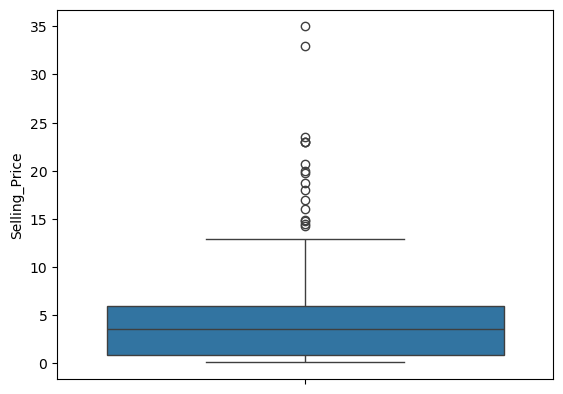

In [372]:
sns.boxplot(y=df['Selling_Price'])

In [374]:
Q1 = df['Selling_Price'].quantile(0.25)
Q3 = df['Selling_Price'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Keep only non-outliers
df_clean = df[(df['Selling_Price'] >= lower_limit) & (df['Selling_Price'] <= upper_limit)]

print("Original data size:", df.shape[0])
print("Cleaned data size:", df_clean.shape[0])


Original data size: 301
Cleaned data size: 284


<Axes: ylabel='Selling_Price'>

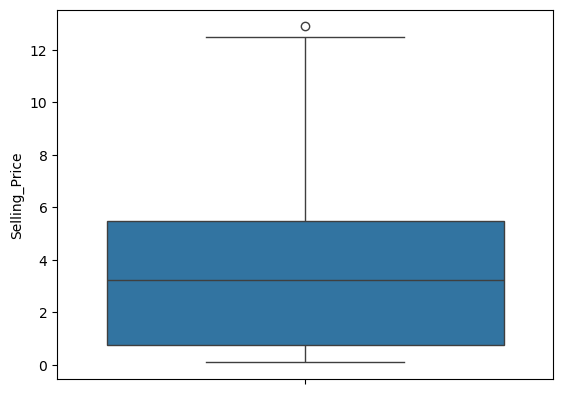

In [376]:
sns.boxplot(y=df_clean['Selling_Price'])

#### Chart - 2 : Distribution Of Numerical Features

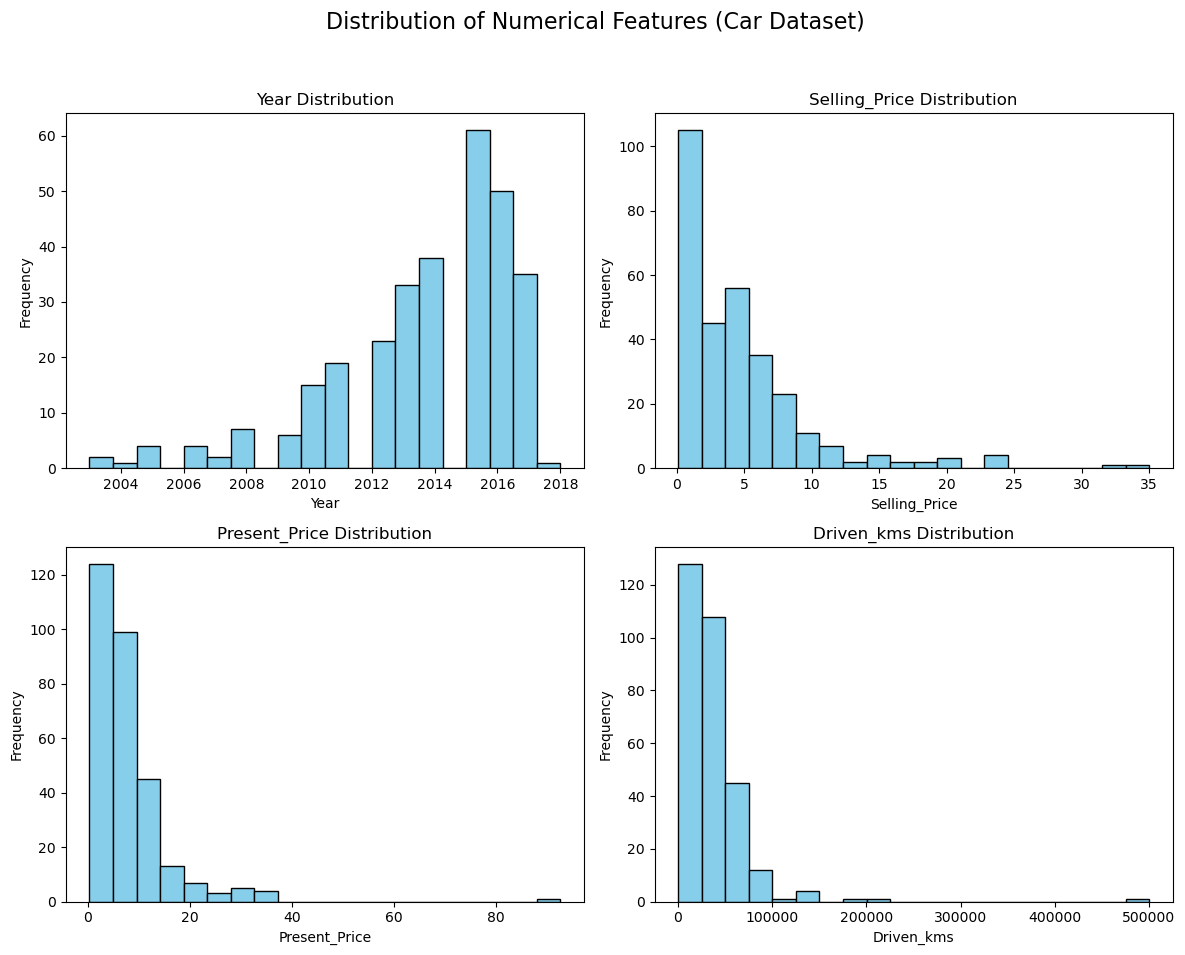

In [379]:
import matplotlib.pyplot as plt

# List of numerical columns you want to plot
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms']

# Set up the plot grid
plt.figure(figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features (Car Dataset)', fontsize=16)

# Plot each numerical feature
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()


#### Chart - 3 : Distribution Of Categorical Features

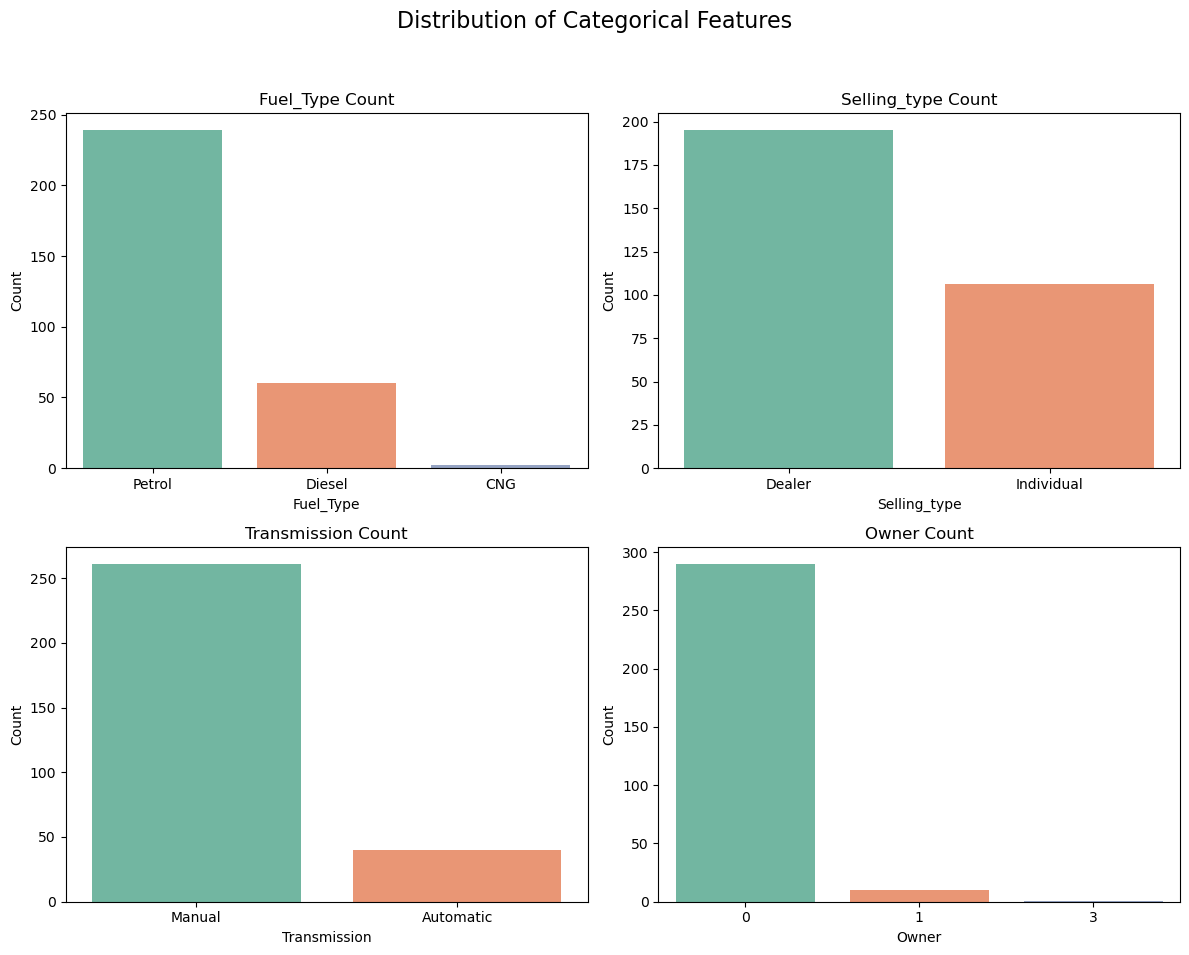

In [382]:
categorical_columns = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']

plt.figure(figsize=(12, 10))
plt.suptitle('Distribution of Categorical Features', fontsize=16)

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'{col} Count')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show() 

#### Chart - 4 : Correlation Heatmap

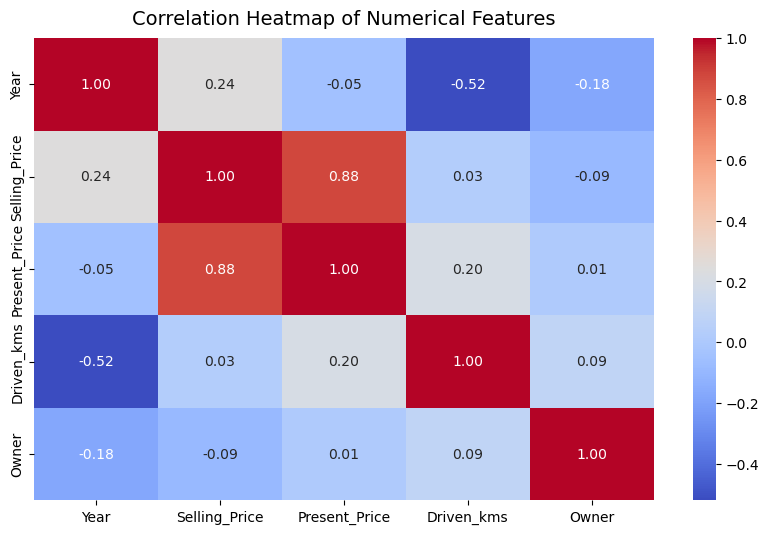

In [385]:
# Select only numerical columns 
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr().round(2)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

# Title and layout
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, pad=10)

# Show plot
plt.show()


## ***5. Feature Engineering & Data Pre-processing***

### 1. Encoding

In [389]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode all object-type (string) columns
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])



In [391]:
# Defining the X and y
x=df.drop(columns=['Selling_Price'], axis=1)
y=df['Selling_Price']

### 2. Data Splitting

In [394]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

In [396]:
# Checking the train distribution of dependent variable
y_train.value_counts()

Selling_Price
0.60    8
0.45    8
5.25    6
4.50    5
4.75    4
       ..
2.65    1
4.60    1
3.50    1
1.70    1
1.00    1
Name: count, Length: 136, dtype: int64

## ***6. ML Model Implementation***

### ML Model - 1 : Linear regression

In [402]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [404]:
y_pred = model1.predict(x_test)

# Evaluation for regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Absolute Error: 1.5096748320732851
Mean Squared Error: 4.6386656528183545
Root Mean Squared Error: 2.1537561730192105
R² Score: 0.8035955064236772


### ML Model - 2 : Decision Tree

In [412]:
# ML Model - 2 Implementation (Correct for regression)
model2 = DecisionTreeRegressor(random_state=20)
model2.fit(x_train, y_train)

DecisionTreeRegressor(random_state=20)

In [416]:
y_pred = model2.predict(x_test)

# Evaluation for regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Absolute Error: 0.4850819672131148
Mean Squared Error: 0.5998967213114756
Root Mean Squared Error: 0.7745300002656292
R² Score: 0.9745999344281926


### ML Model - 3 : Random Forest

In [420]:
model3= RandomForestRegressor(n_estimators=100, random_state=42)
model3.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [422]:
y_pred = model3.predict(x_test)

# Evaluation for regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Absolute Error: 0.5690622950819673
Mean Squared Error: 1.0049939154098353
Root Mean Squared Error: 1.0024938480658299
R² Score: 0.9574478231938472


### ML Model - 4 : SVM (Support Vector Machine)

In [458]:
# ML Model - 4 Implementation

# 1. Scale features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(x)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# 2. Split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 3. Train SVR
from sklearn.svm import SVR
model4 = SVR(kernel='rbf', C=100, epsilon=0.1)
model4.fit(x_train, y_train)

SVR(C=100)

In [476]:
y_pred_scaled = model4.predict(x_test)

# 5. Inverse transform and evaluate
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Evaluation for regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2_score(y_test_orig, y_pred))


Mean Absolute Error: 4.661022349902492
Mean Squared Error: 36.53757982696789
Root Mean Squared Error: 6.044632315283361
R² Score: 0.9689055492206882


### ML Model - 5 : Xtreme Gradient Boosting

In [464]:
# Train the XGBoost classifier
model5 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model5.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [466]:
y_pred = model5.predict(x_test)

# Evaluation for regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Absolute Error: 0.10177493904390364
Mean Squared Error: 0.027766867656344164
Root Mean Squared Error: 0.16663393308790428
R² Score: 0.9689622357592679


## ***Selection of best model***

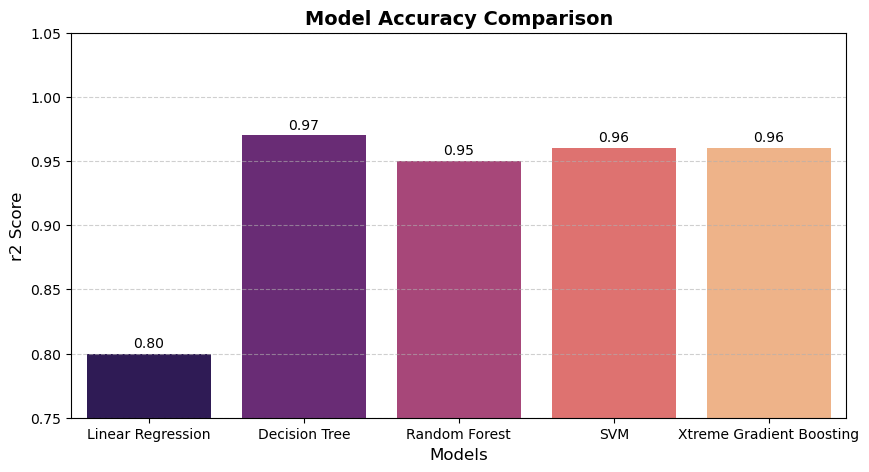

In [470]:
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Xtreme Gradient Boosting']
accuracy_scores = [0.80,0.97, 0.95, 0.96 ,0.96]
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracy_scores, palette="magma")
plt.xlabel("Models", fontsize=12)
plt.ylabel("r2 Score", fontsize=12)
plt.title("Model Accuracy Comparison", fontsize=14, fontweight="bold")
for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc + 0.005, f"{acc:.2f}", ha="center", fontsize=10)
plt.ylim(0.75, 1.05)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

## Checking for Underfitting and Overfitting

In [484]:
from sklearn.metrics import r2_score

# For each model
train_r2 = r2_score(y_train, model4.predict(x_train))
test_r2 = r2_score(y_test, model4.predict(x_test))

print("Train R²:", train_r2)
print("Test R²:", test_r2)


Train R²: 0.9912336559446454
Test R²: 0.9689055492206882


# **Conclusion**

In the Car Price Prediction project, the XGBoost Regressor was selected as the final prediction model due to its strong performance in predicting the selling price of used cars. The goal of the project was to estimate the resale price of a vehicle based on various features such as manufacturing year, present price, fuel type, transmission, and ownership details. After comprehensive data analysis, preprocessing, and model evaluation, the following conclusions were dra

Data Exploration:
The dataset was thoroughly analyzed to understand the distribution of features such as price, kilometers driven, year, and car brand. It was observed that certain features like Present_Price, Year, and Fuel_Type had significant influence on the car's selling price.

Data Preprocessing:
Essential preprocessing steps such as handling categorical variables using label encoding, removing irrelevant features, and feature scaling (for models like SVR) were performed to prepare the dataset for model training.

Model Selection:
Several machine learning regression models were tested, including Linear Regression, Decision Tree, Random Forest, SVR, and XGBoost. Based on performance metrics such as R² score, MAE, and RMSE, the XGBoost Regressor was chosen for its superior accuracy and ability to generalize well to unseen data.

Model Training and Evaluation:
The final model was trained on the training set and evaluated on the test set. It achieved an R² score of 0.96, indicating a very strong correlation between the predicted and actual selling prices. This demonstrated the model's effectiveness in accurately estimating used car prices.

Challenges and Future Work:
Challenges included ensuring proper encoding of categorical features, handling outliers, and avoiding overfitting with high-capacity models. Future work may involve feature enrichment (e.g., including brand popularity, market trends), hyperparameter tuning, and deployment via a web or mobile app for real-time price prediction.

Practical Application:
This model has real-world applicability for used car dealerships, online resale platforms, and individual buyers/sellers to determine fair market value and make informed decisions. It can help automate price estimation, reduce human bias, and improve efficiency in the second-hand automobile market.